In [2]:
# original dataset from : https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions

In [84]:
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize



In [59]:
csvpath = '/Users/laceymorgan/Desktop/my_py/data_jobs_kag/Jobs.csv'

df = pd.read_csv(csvpath)

df.head()

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


In [78]:
#getting the top companies by # of listings 

top_listers = df.groupby(df['company']).count()['title'].sort_values(ascending=False)[0:15]

top_comps = top_listers.index.tolist()
top_comps_nums = top_listers.values.tolist()

/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_99645/2459080648.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_comps, fontdict=font2)


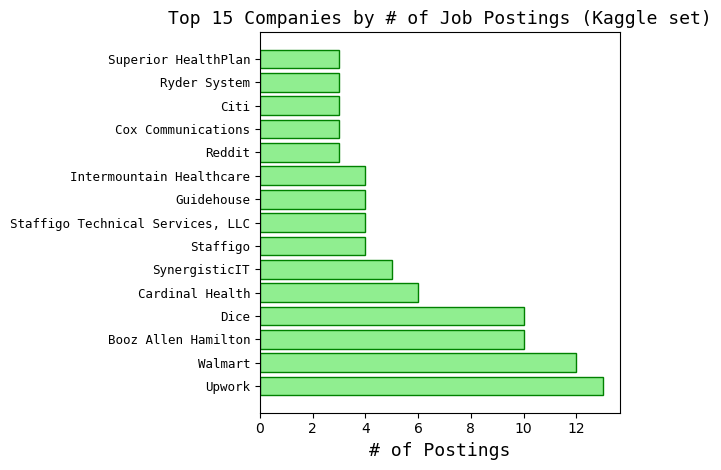

In [79]:
#set fonts that you can apply to lables and titles
font1 = {'family':'monospace','color':'black','size':13}
font2 = {'family':'monospace','color':'black','size':9}

plt.barh(top_comps, top_comps_nums,align='center', color= "lightgreen", edgecolor= "green")

plt.xlabel('# of Postings',fontdict=font1)
plt.title('Top 15 Companies by # of Job Postings (Kaggle set)',fontdict=font1)
plt.gca().set_yticklabels(top_comps, fontdict=font2)

plt.tight_layout()
plt.show()

In [80]:
#getting the top job descriptions by frequency

top_desc = df.groupby(df['title']).count()['description'].sort_values(ascending=False)[0:15]

top_title = top_desc.index.tolist()
top_title_nums = top_desc.values.tolist()

/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_99645/2961884654.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_title, fontdict=font2)


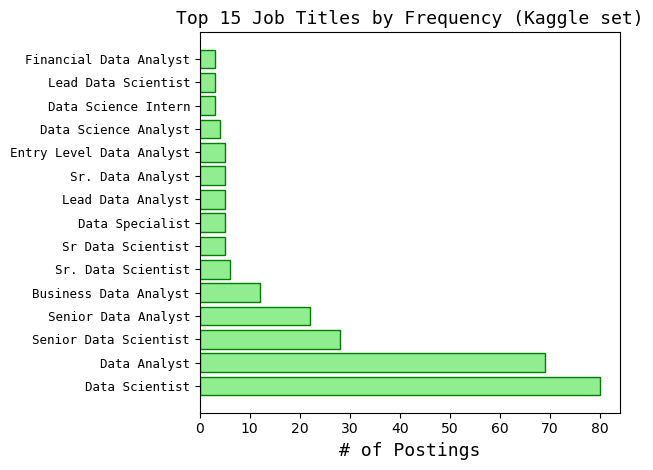

In [81]:
#set fonts that you can apply to lables and titles
font1 = {'family':'monospace','color':'black','size':13}
font2 = {'family':'monospace','color':'black','size':9}

plt.barh(top_title, top_title_nums,align='center', color= "lightgreen", edgecolor= "green")

plt.xlabel('# of Postings',fontdict=font1)
plt.title('Top 15 Job Titles by Frequency (Kaggle set)',fontdict=font1)
plt.gca().set_yticklabels(top_title, fontdict=font2)

plt.tight_layout()
plt.show()

In [102]:
# Define the pattern to match
pattern = r'\b(senior|sr|sr.|lead|manager|intern|Senior|sr .)\b'
# new  with only the names that don't match the pattern
#tilde (~) operator is used as a negation operator in Python. When used with a boolean 
# expression, such as a pandas Series of boolean values, it negates the values, so 
# that True values become False and vice versa.
filtered_df = df.loc[~df['title'].str.contains(pattern, flags=re.IGNORECASE)].copy()


/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_99645/2869048309.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df.loc[~df['title'].str.contains(pattern, flags=re.IGNORECASE)].copy()


In [114]:
top_filtered_desc = filtered_df.groupby(filtered_df['title']).count()['description'].sort_values(ascending=False)[0:15]

top_filtered_title = top_filtered_desc.index.tolist()
top_filtered_title_nums = top_filtered_desc.values.tolist()

In [116]:
check_2 = filtered_df.loc[filtered_df['title'].str.contains('Senior')]

check_2

,Unnamed: 0,title,company,announcement,description


/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_99645/1789271705.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_filtered_title, fontdict=font2)


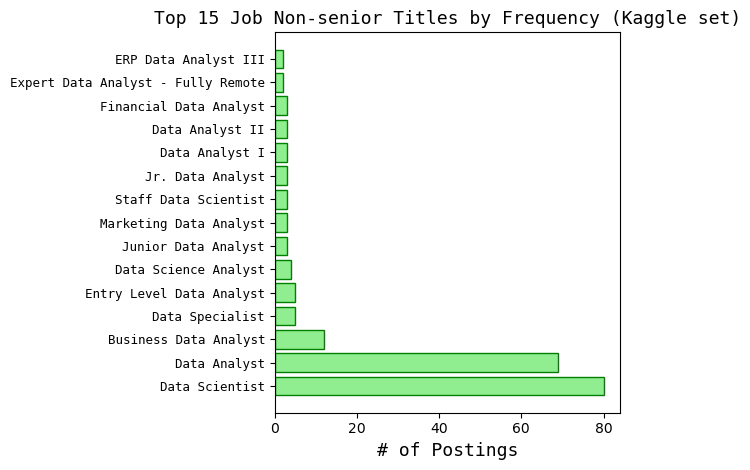

In [126]:
#set fonts that you can apply to lables and titles
font1 = {'family':'monospace','color':'black','size':13}
font2 = {'family':'monospace','color':'black','size':9}

plt.barh(top_filtered_title, top_filtered_title_nums,align='center', color= "lightgreen", edgecolor= "green")

plt.xlabel('# of Postings',fontdict=font1)
plt.title('Top 15 Job Non-senior Titles by Frequency (Kaggle set)',fontdict=font1)
plt.gca().set_yticklabels(top_filtered_title, fontdict=font2)

plt.tight_layout()
plt.show()

In [127]:
#getting the top listings sites by frequency

top_announce = df.groupby(df['announcement']).count()['description'].sort_values(ascending=False)[0:15]

top_announce_name = top_announce.index.tolist()
top_announce_nums = top_announce.values.tolist()

#.tolist is giving an error this time so trying it this way
# top_announce_nums = top_announce.apply(lambda x: x.tolist()).values.tolist()



/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_99645/2567224083.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_announce_name, fontdict=font2)


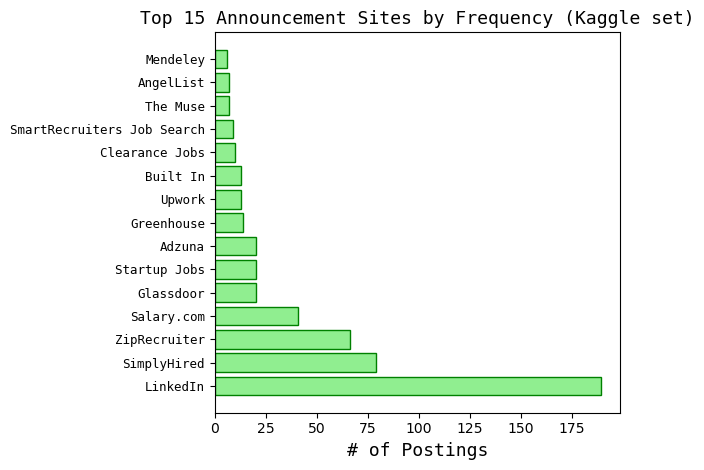

In [128]:
#set fonts that you can apply to lables and titles
font1 = {'family':'monospace','color':'black','size':13}
font2 = {'family':'monospace','color':'black','size':9}

plt.barh(top_announce_name, top_announce_nums,align='center', color= "lightgreen", edgecolor= "green")

plt.xlabel('# of Postings',fontdict=font1)
plt.title('Top 15 Announcement Sites by Frequency (Kaggle set)',fontdict=font1)
plt.gca().set_yticklabels(top_announce_name, fontdict=font2)

plt.tight_layout()
plt.show()

In [129]:

# Function to extract keywords from a description
def extract_keywords(description):
    # Tokenize the description into words
    tokens = word_tokenize(description)

    # Calculate word frequencies
    fdist = FreqDist(tokens)

    # Get the most frequent words
    most_common = fdist.most_common(10)

    # Extract the keywords
    keywords = [word for word, count in most_common]

    return keywords

# Apply the extract_keywords function to each description in the dataframe
df['keywords'] = df['description'].apply(extract_keywords)

df.head()


,Unnamed: 0,title,company,announcement,description,keywords
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...,"[,, and, to, ., •, of, the, with, 'll, our]"
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...,"[,, and, ., the, to, •, a, of, with, for]"
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ...","[,, ., and, to, of, a, •, Discover, work, is]"
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...,"[,, and, to, •, a, ., with, work, You, our]"
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla...","[,, and, ., data, in, to, of, the, NORC, a]"


In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.parse.chart import LeftCornerChartParser
from nltk.parse import DependencyGraph

# The text description
text = "The ideal candidate will have a Bachelor's degree in Computer Science and 5 years of experience in software development."

# Tokenize the text into words
tokens = word_tokenize(text)

# Perform Part-of-Speech tagging on the tokens
tagged_tokens = pos_tag(tokens)

# Initialize an empty list to store the extracted noun phrases
noun_phrases = []

# Loop through the tagged tokens to extract the noun phrases
for i in range(len(tagged_tokens)):
    # If the current token is a noun
    if tagged_tokens[i][1] == "NN":
        # Initialize a variable to store the end index of the noun phrase
        j = i + 1
        # Keep adding adjectives and nouns to the noun phrase until the end of the text or until a non-noun/adjective is found
        while j < len(tagged_tokens) and (tagged_tokens[j][1] == "JJ" or tagged_tokens[j][1] == "NN"):
            j += 1
        # Join the words in the noun phrase and add it to the list of noun phrases
        noun_phrases.append(" ".join([t[0] for t in tagged_tokens[i:j]]))

# Print the list of extracted noun phrases
print("Noun Phrases:", noun_phrases)


In [42]:
search = GoogleSearch({
    "q": "coffee", 
    "location": "Minneapolis, Minnesota",
    "api_key": f'{serp_api}'
  })
result = search.get_dict()


https://serpapi.com/search


In [50]:
url = result['local_results']['more_locations_link']
print(url)
# response = requests.get(url)

# data = response.json()


https://www.google.com/search?tbs=lf:1,lf_ui:9&tbm=lcl&q=coffee&rflfq=1&num=10&uule=w+CAIQICIjTWlubmVhcG9saXMsTWlubmVzb3RhLFVuaXRlZCBTdGF0ZXM&sa=X&ved=2ahUKEwiizZ2xq4v9AhUhkYkEHf_mB0cQjGp6BAhcEAI


In [46]:
print(data)

<Response [200]>


In [29]:
for i in range(0,len(result)+1):
    pprint.pprint(result['local_results']['places'][i]['title'])
    pprint.pprint(result['local_results']['places'][i]['address'])



'Starbucks'
'120 South 6th St · In the Canadian Pacific Plaza'
'Caribou Coffee'
'200 South 6th St · In the U.S. Bank Plaza'
'Spyhouse Coffee Roasters'
'215 S 4th St · In Emery, Autograph Collection'


IndexError: list index out of range